In [86]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
from sklearn.svm import SVC
from keras.layers import Dense
from scipy.stats import uniform
import matplotlib.pyplot as plt
from keras.models import Sequential
from catboost import CatBoostRegressor
from sklearn.metrics import roc_auc_score
from scipy.stats import randint as sp_randint
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.preprocessing import MinMaxScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import os

# To plot pretty figures
%matplotlib inline

# Xinyi yu; 
# I work and submit alone; 
# Student number : 33737421; 

In [87]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 0.0 Overall description 

#### The data represents information about 768 buildings, where each building is described by 10 features (9 numerical and 1 categorical) and a target variable "Heating Load" (also numerical).

Here's a brief description of the features:

X0: Category of the building (categorical variable)

X1: Relative Compactness (a measure of how tightly packed the building is)

X2: Surface Area (the total surface area of the building)

X3: Wall Area (the total area of the building's walls)

X4: Roof Area (the total area of the building's roof)

X5: Overall Height (the overall height of the building)

X6: Orientation (the building's orientation)

X7: Glazing Area (the total area of the building's windows)

X8: Glazing Area Distribution (the distribution of the building's windows)

Y: Heating Load (the amount of heating required to maintain a comfortable temperature inside the building)

The data frame has 768 entries (rows) and 10 columns. The "Non-Null Count" column indicates the number of non-missing values in each column, and the "Dtype" column indicates the data type of each column. The memory usage of the data frame is also shown. Finally, the "Index" column shows the column names of the data frame.

In [88]:
#read data
data = pd.read_csv('/Users/xinyiyu/Desktop/Machine_learning_ IS53051A/assessment1/submit2/datcw_na.csv')

In [89]:
data = data.rename(columns={
    "X0": "Building Category",
    "X1": "Relative Compactness",
    "X2": "Surface Area",
    "X3": "Wall Area",
    "X4": "Roof Area",
    "X5": "Overall Height",
    "X6": "Orientation",
    "X7": "Glazing Area",
    "X8": "Glazing Area Distribution",
    "Y": "Heating Load"
})

# 0.1 Create a training and test set at the very begining

### In this case, we will only use the piple to preprocess the training data

In [90]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [91]:
#split data into training and testing
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [92]:
test_set.head()

,Building Category,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
668,C2,0.68,800.42,444.68,242.55,3.47,1.98,0.32,3.63,16.47
324,C2,0.59,683.55,350.35,242.55,3.47,2.42,0.25,0.90,13.17
624,C2,0.97,509.36,291.06,121.28,5.67,1.62,0.32,2.70,32.82
690,C2,0.64,700.70,339.57,161.70,6.93,3.96,0.40,3.60,41.32
473,C1,0.77,776.16,NaN,266.80,3.47,2.97,0.25,4.40,16.69


In [93]:
x_train = train_set.copy()

# 1.0 Data inspection

## 1.1 Print the first few rows of the dataset to get an overview of the data:

In [94]:
print(data.head())

  Building Category  Relative Compactness  Surface Area  Wall Area  Roof Area  \
0                C3                  1.19        622.55        NaN      89.31   
1                C1                  1.19        622.55     323.40     109.15   
2                C1                  0.88        463.05     291.06      99.23   
3                C2                  0.79        509.36     291.06     121.28   
4                C1                  0.89        507.15     385.39     121.28   

   Overall Height  Orientation  Glazing Area  Glazing Area Distribution  \
0            7.00         1.98           0.0                        0.0   
1            7.70         3.00           0.0                        0.0   
2            5.67         4.40           0.0                        0.0   
3            6.30         4.05           0.0                        0.0   
4            7.70         2.00           0.0                        0.0   

   Heating Load  
0         15.55  
1         15.55  
2       

## 1.2 Check the shape of the dataset:

In [95]:
print(data.shape)

(768, 10)


## 1.3 check the data types of the columns:

In [96]:
print(data.dtypes)

Building Category             object
Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                  float64
Glazing Area                 float64
Glazing Area Distribution    float64
Heating Load                 float64
dtype: object


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building Category          768 non-null    object 
 1   Relative Compactness       768 non-null    float64
 2   Surface Area               768 non-null    float64
 3   Wall Area                  728 non-null    float64
 4   Roof Area                  768 non-null    float64
 5   Overall Height             768 non-null    float64
 6   Orientation                768 non-null    float64
 7   Glazing Area               768 non-null    float64
 8   Glazing Area Distribution  768 non-null    float64
 9   Heating Load               768 non-null    float64
dtypes: float64(9), object(1)
memory usage: 60.1+ KB


### Notice that building category is the only nominal/categorical variable, with the following counts on its values

In [98]:
data['Building Category'].value_counts()

C2    265
C3    260
C1    243
Name: Building Category, dtype: int64

## 1.4 check for missing values:

In [99]:
print(data.isnull().sum())

Building Category             0
Relative Compactness          0
Surface Area                  0
Wall Area                    40
Roof Area                     0
Overall Height                0
Orientation                   0
Glazing Area                  0
Glazing Area Distribution     0
Heating Load                  0
dtype: int64


## 1.5 check for duplicates:

In [100]:
print(data.duplicated().sum())

0


In [101]:
data.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
count,768.000000,768.000000,728.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.763516,666.768997,321.102527,176.564141,5.229766,3.527331,0.237852,2.803737,22.307201
std,0.147093,120.863329,60.479340,51.280618,1.844813,1.245710,0.139736,1.597817,10.090196
min,0.500000,416.740000,198.450000,89.310000,2.840000,1.620000,0.000000,0.000000,6.010000
25%,0.650000,575.510000,277.830000,132.300000,3.470000,2.427500,0.100000,1.517500,12.992500
50%,0.750000,661.500000,315.320000,178.235000,4.955000,3.600000,0.240000,2.970000,18.950000
75%,0.860000,741.130000,355.740000,218.300000,6.930000,4.425000,0.360000,3.960000,31.667500
max,1.190000,978.290000,503.970000,266.800000,8.470000,6.050000,0.480000,6.050000,43.100000


### visualise the data with histograms showing bars of frequencies of  numeric values prouped in bins 


Saving figure attribute_histogram_plots


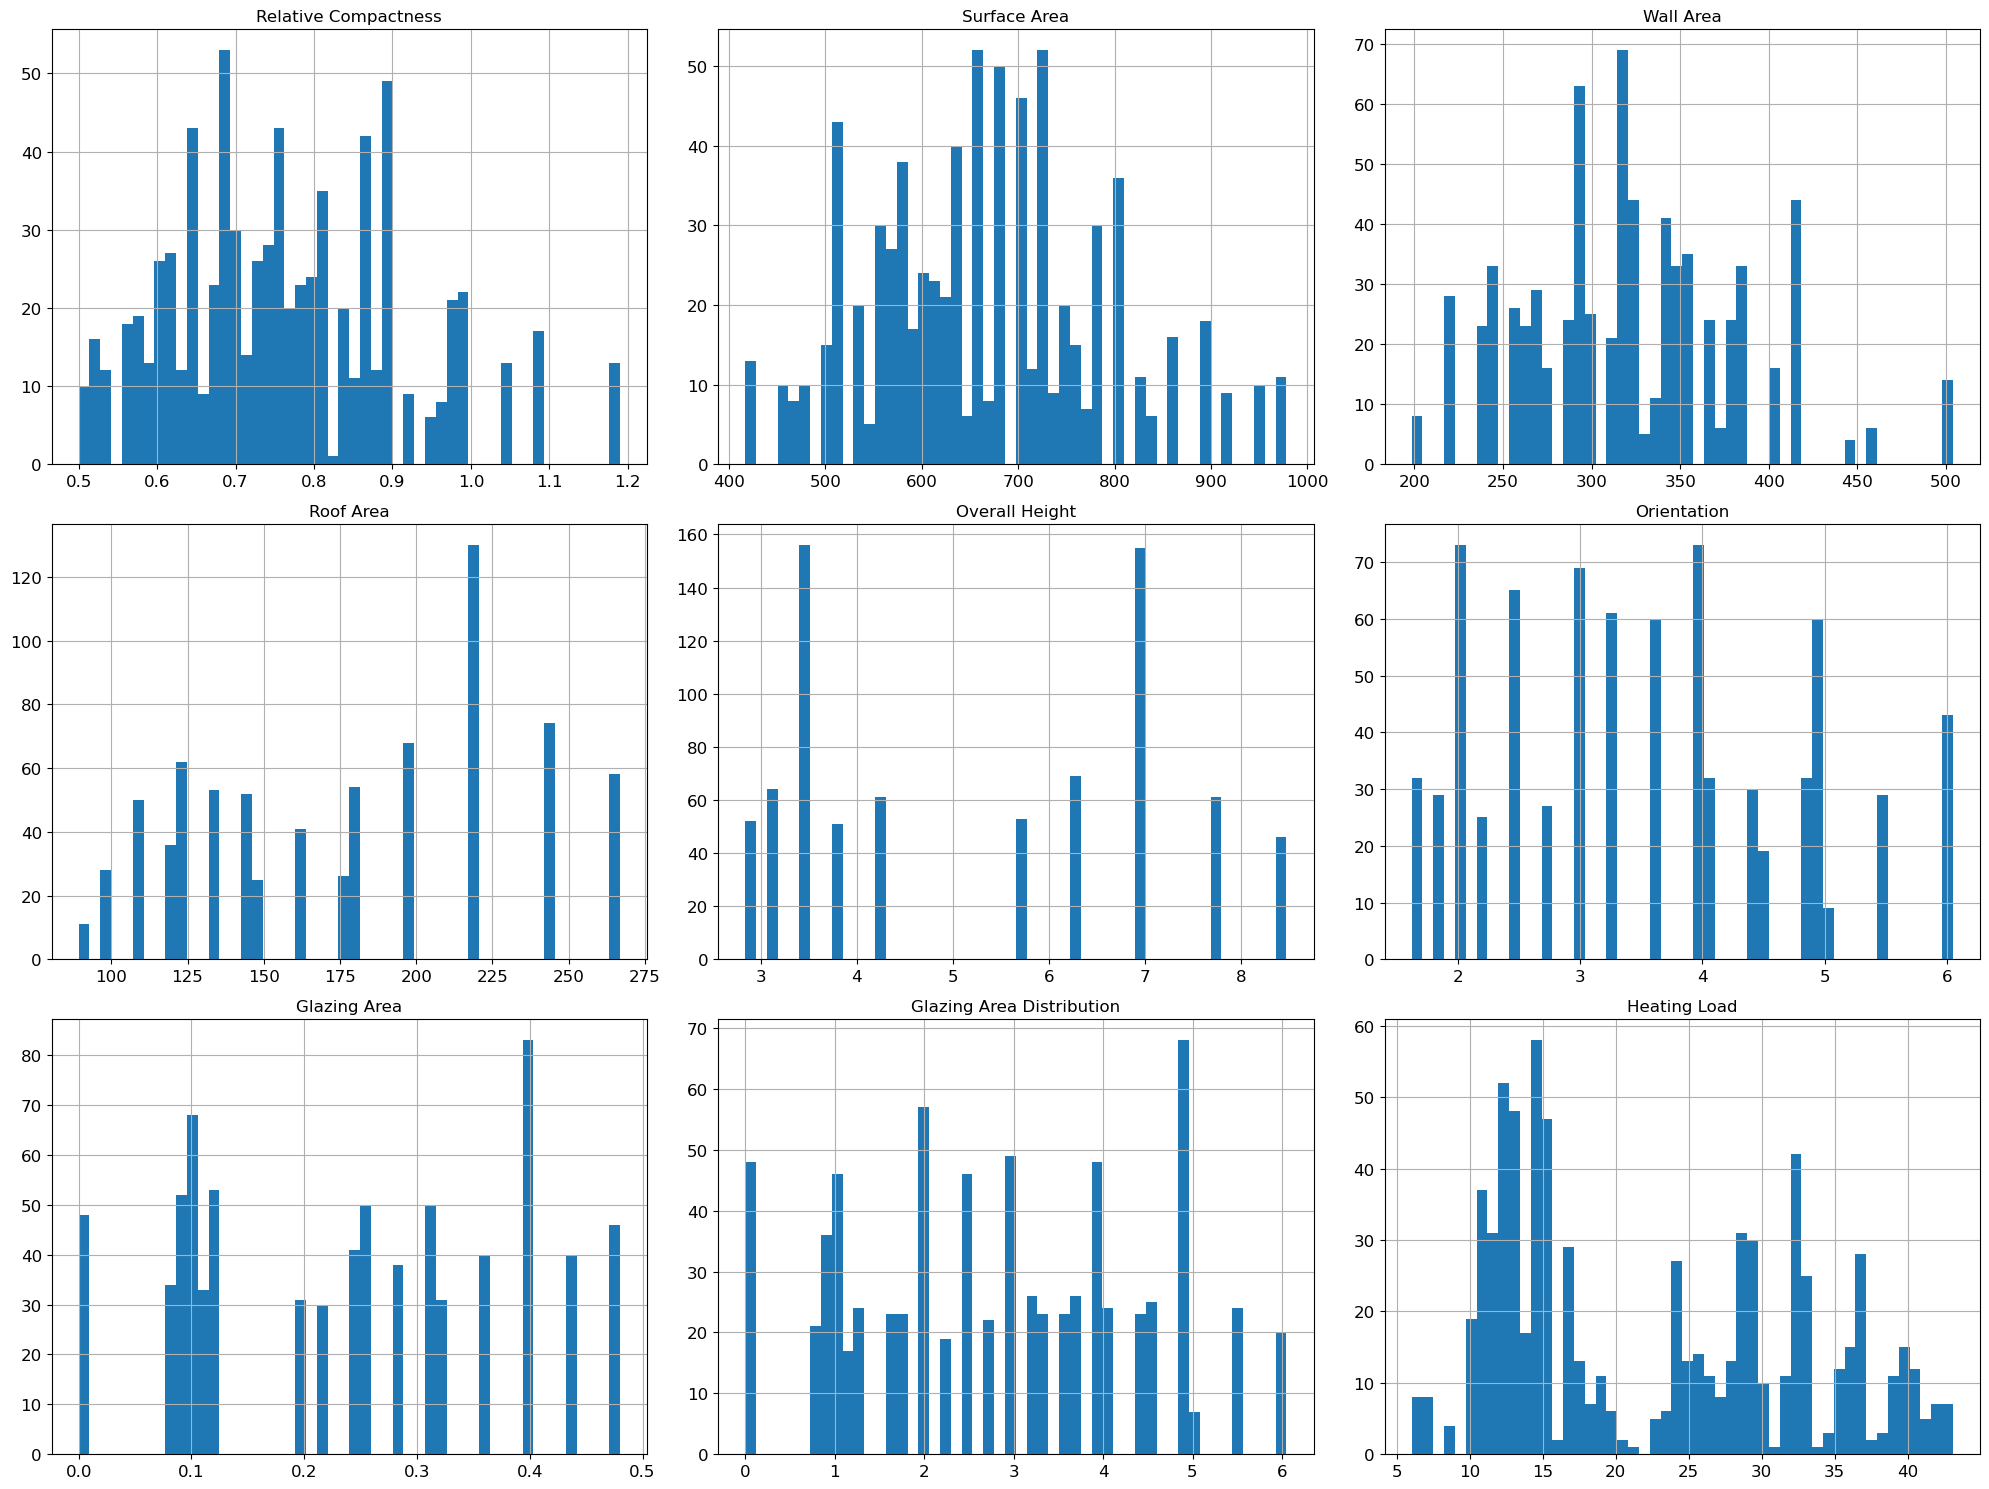

In [102]:
%matplotlib inline
data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## 1.6 check for unique values:

In [103]:
for col in data.columns:
    print(col, data[col].nunique())

Building Category 3
Relative Compactness 45
Surface Area 65
Wall Area 40
Roof Area 21
Overall Height 12
Orientation 24
Glazing Area 17
Glazing Area Distribution 31
Heating Load 586


## 1.7 check for outliers:

<AxesSubplot: >

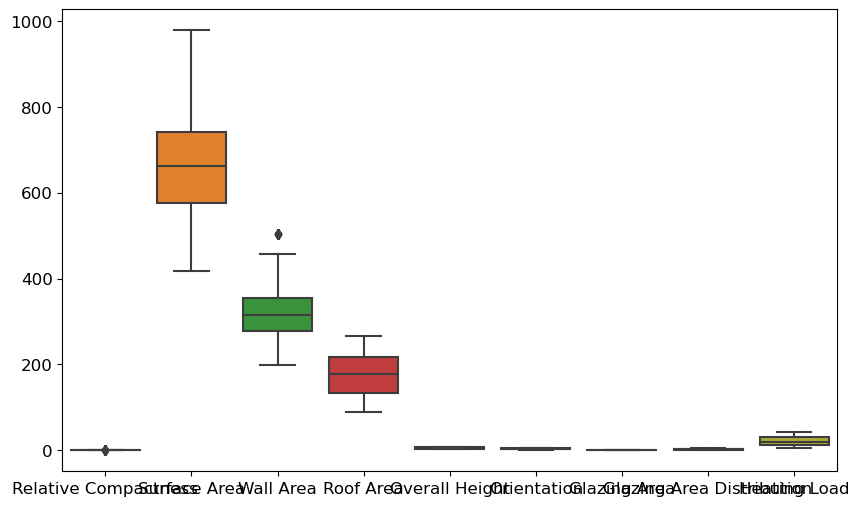

In [104]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data)

## 1.8 check for correlation between features:

/var/folders/_p/gfnktzm9703_5hc477v808r00000gn/T/ipykernel_8929/3968971439.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot: >

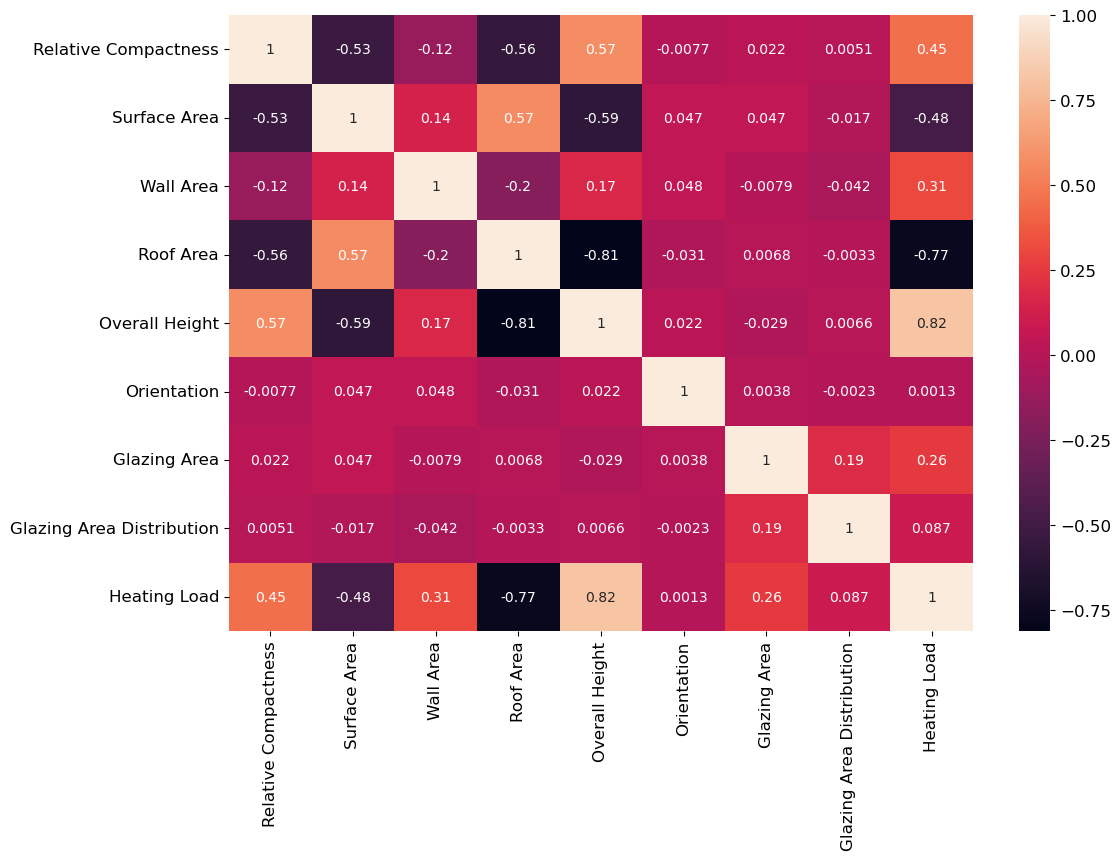

In [105]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

### Heating load is related to overall height 

### Roof area is related to overal height negatively

### Heating load is related to roof area as well 

### Heating load is not related to Glazing area distrbution as well 

## 1.9 visualize the distribution of each feature 

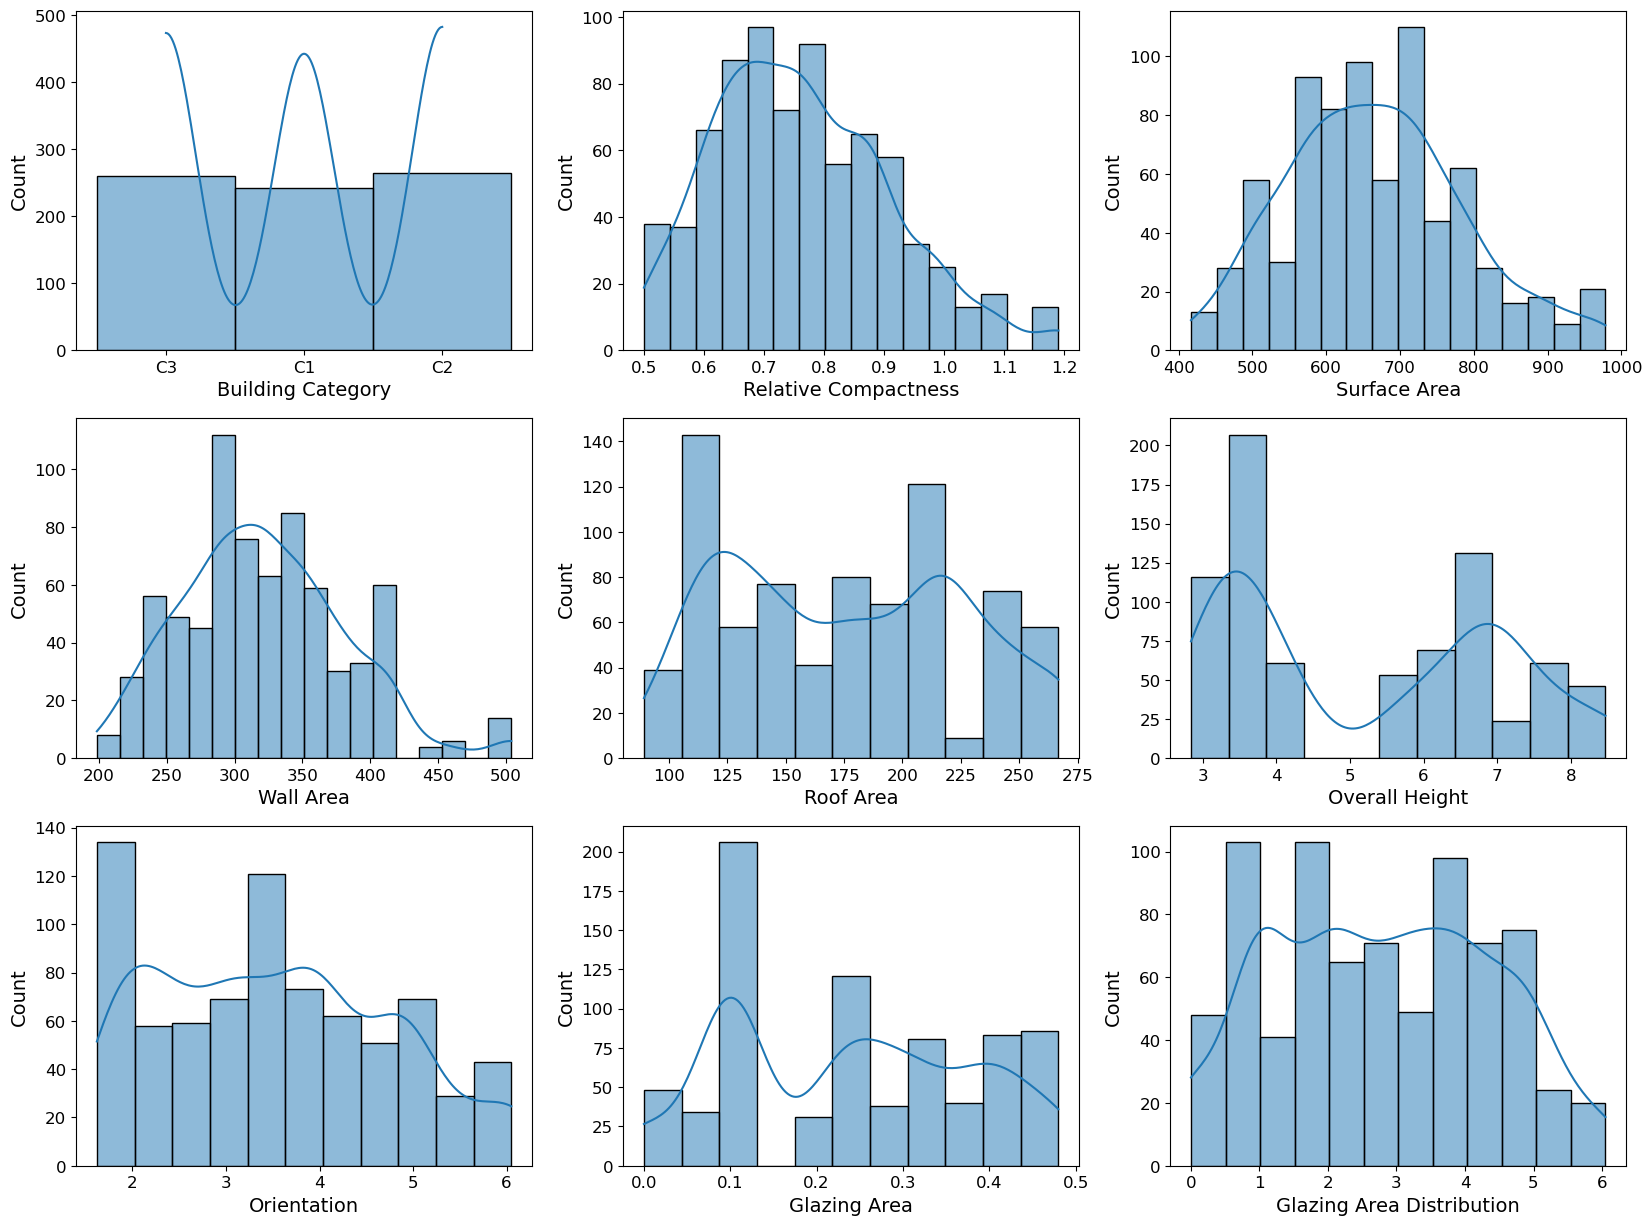

In [106]:
plt.figure(figsize=(20,15))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[col], kde=True)

In [107]:
corr_matrix = data.corr()
corr_matrix["Heating Load"].sort_values(ascending=False)

/var/folders/_p/gfnktzm9703_5hc477v808r00000gn/T/ipykernel_8929/3076614754.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


Heating Load                 1.000000
Overall Height               0.815769
Relative Compactness         0.454177
Wall Area                    0.312449
Glazing Area                 0.255901
Glazing Area Distribution    0.087106
Orientation                  0.001340
Surface Area                -0.481192
Roof Area                   -0.771040
Name: Heating Load, dtype: float64

<AxesSubplot: >

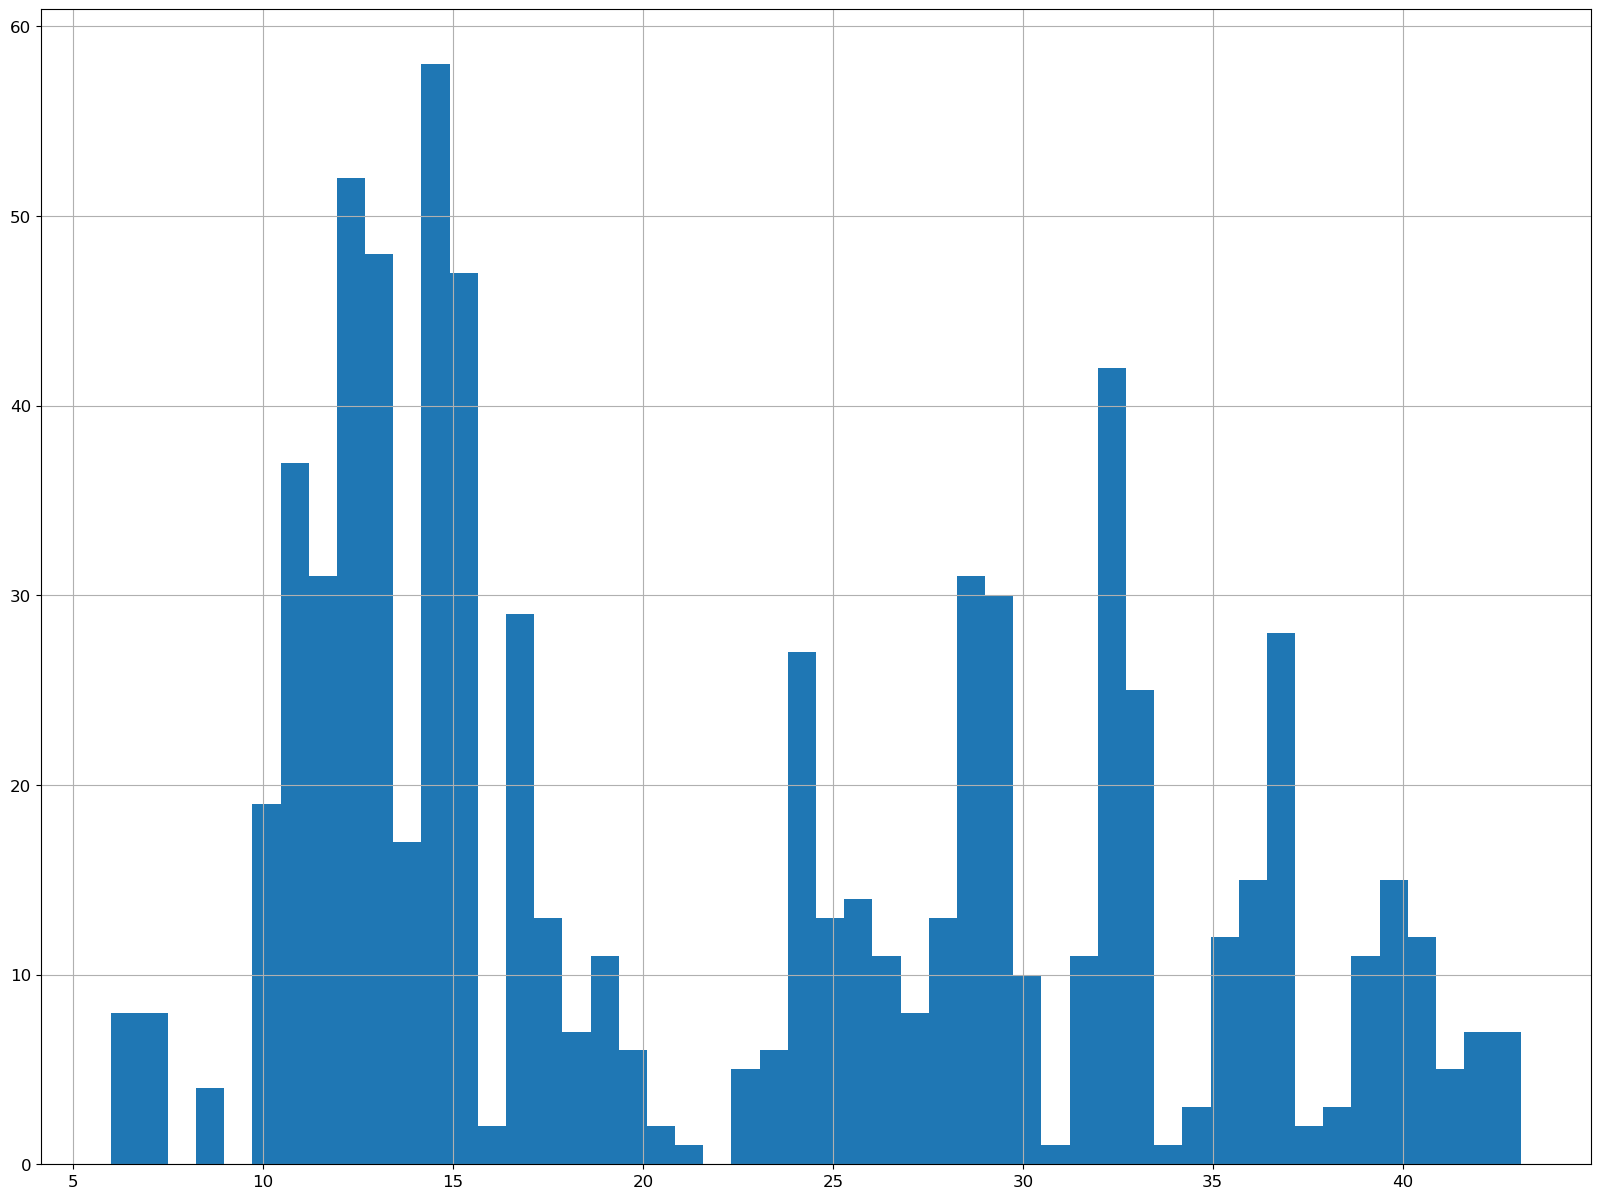

In [108]:
data["Heating Load"].hist(bins=50, figsize=(20,15))

In [109]:
data["Heating_load_cat"] = pd.cut(data["Heating Load"],
                                    bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf],
                                    labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
data["Heating_load_cat"].value_counts()

2     377
3     170
4     167
5      34
1      20
6       0
7       0
8       0
9       0
10      0
11      0
Name: Heating_load_cat, dtype: int64

<AxesSubplot: >

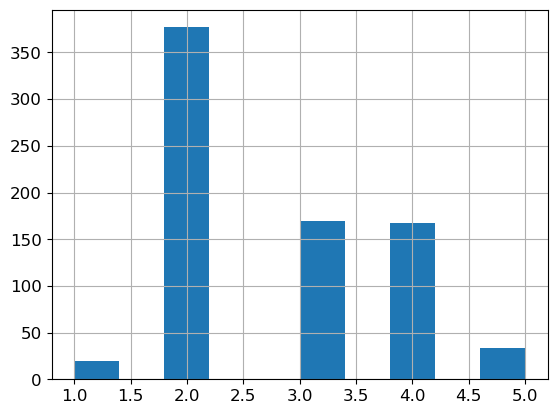

In [110]:
data["Heating_load_cat"].hist()

In [111]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Heating_load_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [112]:
strat_test_set["Heating_load_cat"].value_counts() / len(strat_test_set)

2     0.493506
3     0.220779
4     0.214286
5     0.045455
1     0.025974
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
Name: Heating_load_cat, dtype: float64

In [113]:
data["Heating_load_cat"].value_counts() / len(data)

2     0.490885
3     0.221354
4     0.217448
5     0.044271
1     0.026042
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
Name: Heating_load_cat, dtype: float64

The code is defining a function called heating_load_cat_proportions that takes a DataFrame and returns the proportion of each category in the "Heating_load_cat" column.

The function is then applied to the data DataFrame to get the overall category proportions.

The train_test_split function is used to split the data DataFrame into a training set (train_set) and a testing set (test_set). The testing set contains 20% of the data and the random seed is set to 42 for reproducibility.

The heating_load_cat_proportions function is then applied to both the strat_test_set and test_set DataFrames to get the category proportions for each.

A DataFrame called compare_props is created to compare the category proportions for the overall, stratified, and random sets. The DataFrame contains three columns, one for each set, and each column contains the proportion of each category.

Two additional columns are added to compare_props to calculate the percentage errors of the random and stratified sets compared to the overall set. The "Rand. %error" column contains the percentage difference between the "Random" column and the "Overall" column, while the "Strat. %error" column contains the percentage difference between the "Stratified" column and the "Overall" column.

Compare_props is sorted by index to make it easier to compare the category proportions.

In [114]:
def heating_load_cat_proportions(data):
    return data["Heating_load_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": heating_load_cat_proportions(data),
    "Stratified": heating_load_cat_proportions(strat_test_set),
    "Random": heating_load_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

### Overall, the code is comparing the proportions of the different categories in the "Heating_load_cat" column between the original data dataframe and the subsets of the testing set, to see whether the subsets are representative of the original data. 

In [115]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.026042,0.025974,0.025974,-0.259740,-0.259740
2,0.490885,0.493506,0.461039,-6.080127,0.533949
3,0.221354,0.220779,0.233766,5.607334,-0.259740
4,0.217448,0.214286,0.233766,7.504472,-1.454234
5,0.044271,0.045455,0.045455,2.673797,2.673797
6,0.000000,0.000000,0.000000,NaN,NaN
7,0.000000,0.000000,0.000000,NaN,NaN
8,0.000000,0.000000,0.000000,NaN,NaN
9,0.000000,0.000000,0.000000,NaN,NaN
10,0.000000,0.000000,0.000000,NaN,NaN


### Analyse: The percentage errors can be used to evaluate the representativeness of the subsets. A percentage error close to zero indicates that the subset is representative of the original data, while a large percentage error indicates that the subset is not representative. in this case, we could safely use the training and testing data.


# 2.0 think about handling outlier and inconsistent data;

# 2.1  Checking missing value and fill them 

In [116]:
#identify missing values
missing_values = data.isnull()

print(missing_values)

     Building Category  Relative Compactness  Surface Area  Wall Area  \
0                False                 False         False       True   
1                False                 False         False      False   
2                False                 False         False      False   
3                False                 False         False      False   
4                False                 False         False      False   
..                 ...                   ...           ...        ...   
763              False                 False         False      False   
764              False                 False         False       True   
765              False                 False         False      False   
766              False                 False         False      False   
767              False                 False         False      False   

     Roof Area  Overall Height  Orientation  Glazing Area  \
0        False           False        False         False   
1

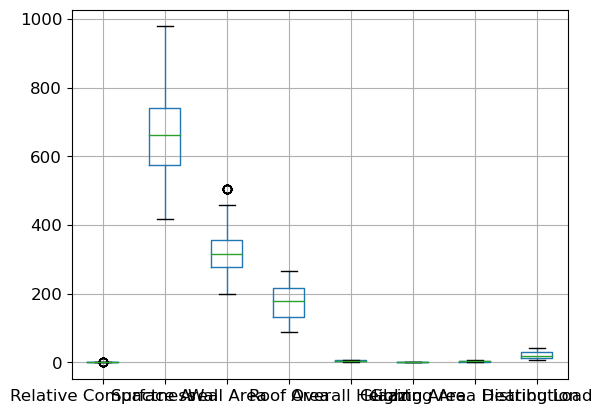

In [117]:
data.boxplot(column=["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Glazing Area", "Glazing Area Distribution", "Heating Load"])
plt.show()

# 2.2 Handling Missing Values:

### There are several ways to handle missing values in a pandas DataFrame. Here are a few examples:

### Remove rows with missing values using the dropna method:

#### Fill missing values with a specific value using the fillna method:  

#### In this case, since the missing values are concentrated in one column, this will consider using the non-missing values in the "wall area" column to calculate the mean, median, or mode and use that value to replace the missing values. This approach could help to preserve the distribution of the data and reduce the impact of outliers on the imputation.

In [118]:
mean_wall_area = data['Wall Area'].mean()
data['Wall Area'].fillna(mean_wall_area, inplace=True)

In [119]:
print(data.isnull().sum())

Building Category            0
Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Heating_load_cat             0
dtype: int64


In [120]:
data.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.763516,666.768997,321.102527,176.564141,5.229766,3.527331,0.237852,2.803737,22.307201
std,0.147093,120.863329,58.881189,51.280618,1.844813,1.245710,0.139736,1.597817,10.090196
min,0.500000,416.740000,198.450000,89.310000,2.840000,1.620000,0.000000,0.000000,6.010000
25%,0.650000,575.510000,286.650000,132.300000,3.470000,2.427500,0.100000,1.517500,12.992500
50%,0.750000,661.500000,318.500000,178.235000,4.955000,3.600000,0.240000,2.970000,18.950000
75%,0.860000,741.130000,355.740000,218.300000,6.930000,4.425000,0.360000,3.960000,31.667500
max,1.190000,978.290000,503.970000,266.800000,8.470000,6.050000,0.480000,6.050000,43.100000


# 3.1 Discover and Visualize the Data to Gain Insights

In [121]:
# after stratified sampling using incame_cat we drop this variable from the train and test datasets
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Heating_load_cat", axis=1, inplace=True)

# 3.2  Visualizing Data

Saving figure pairplot


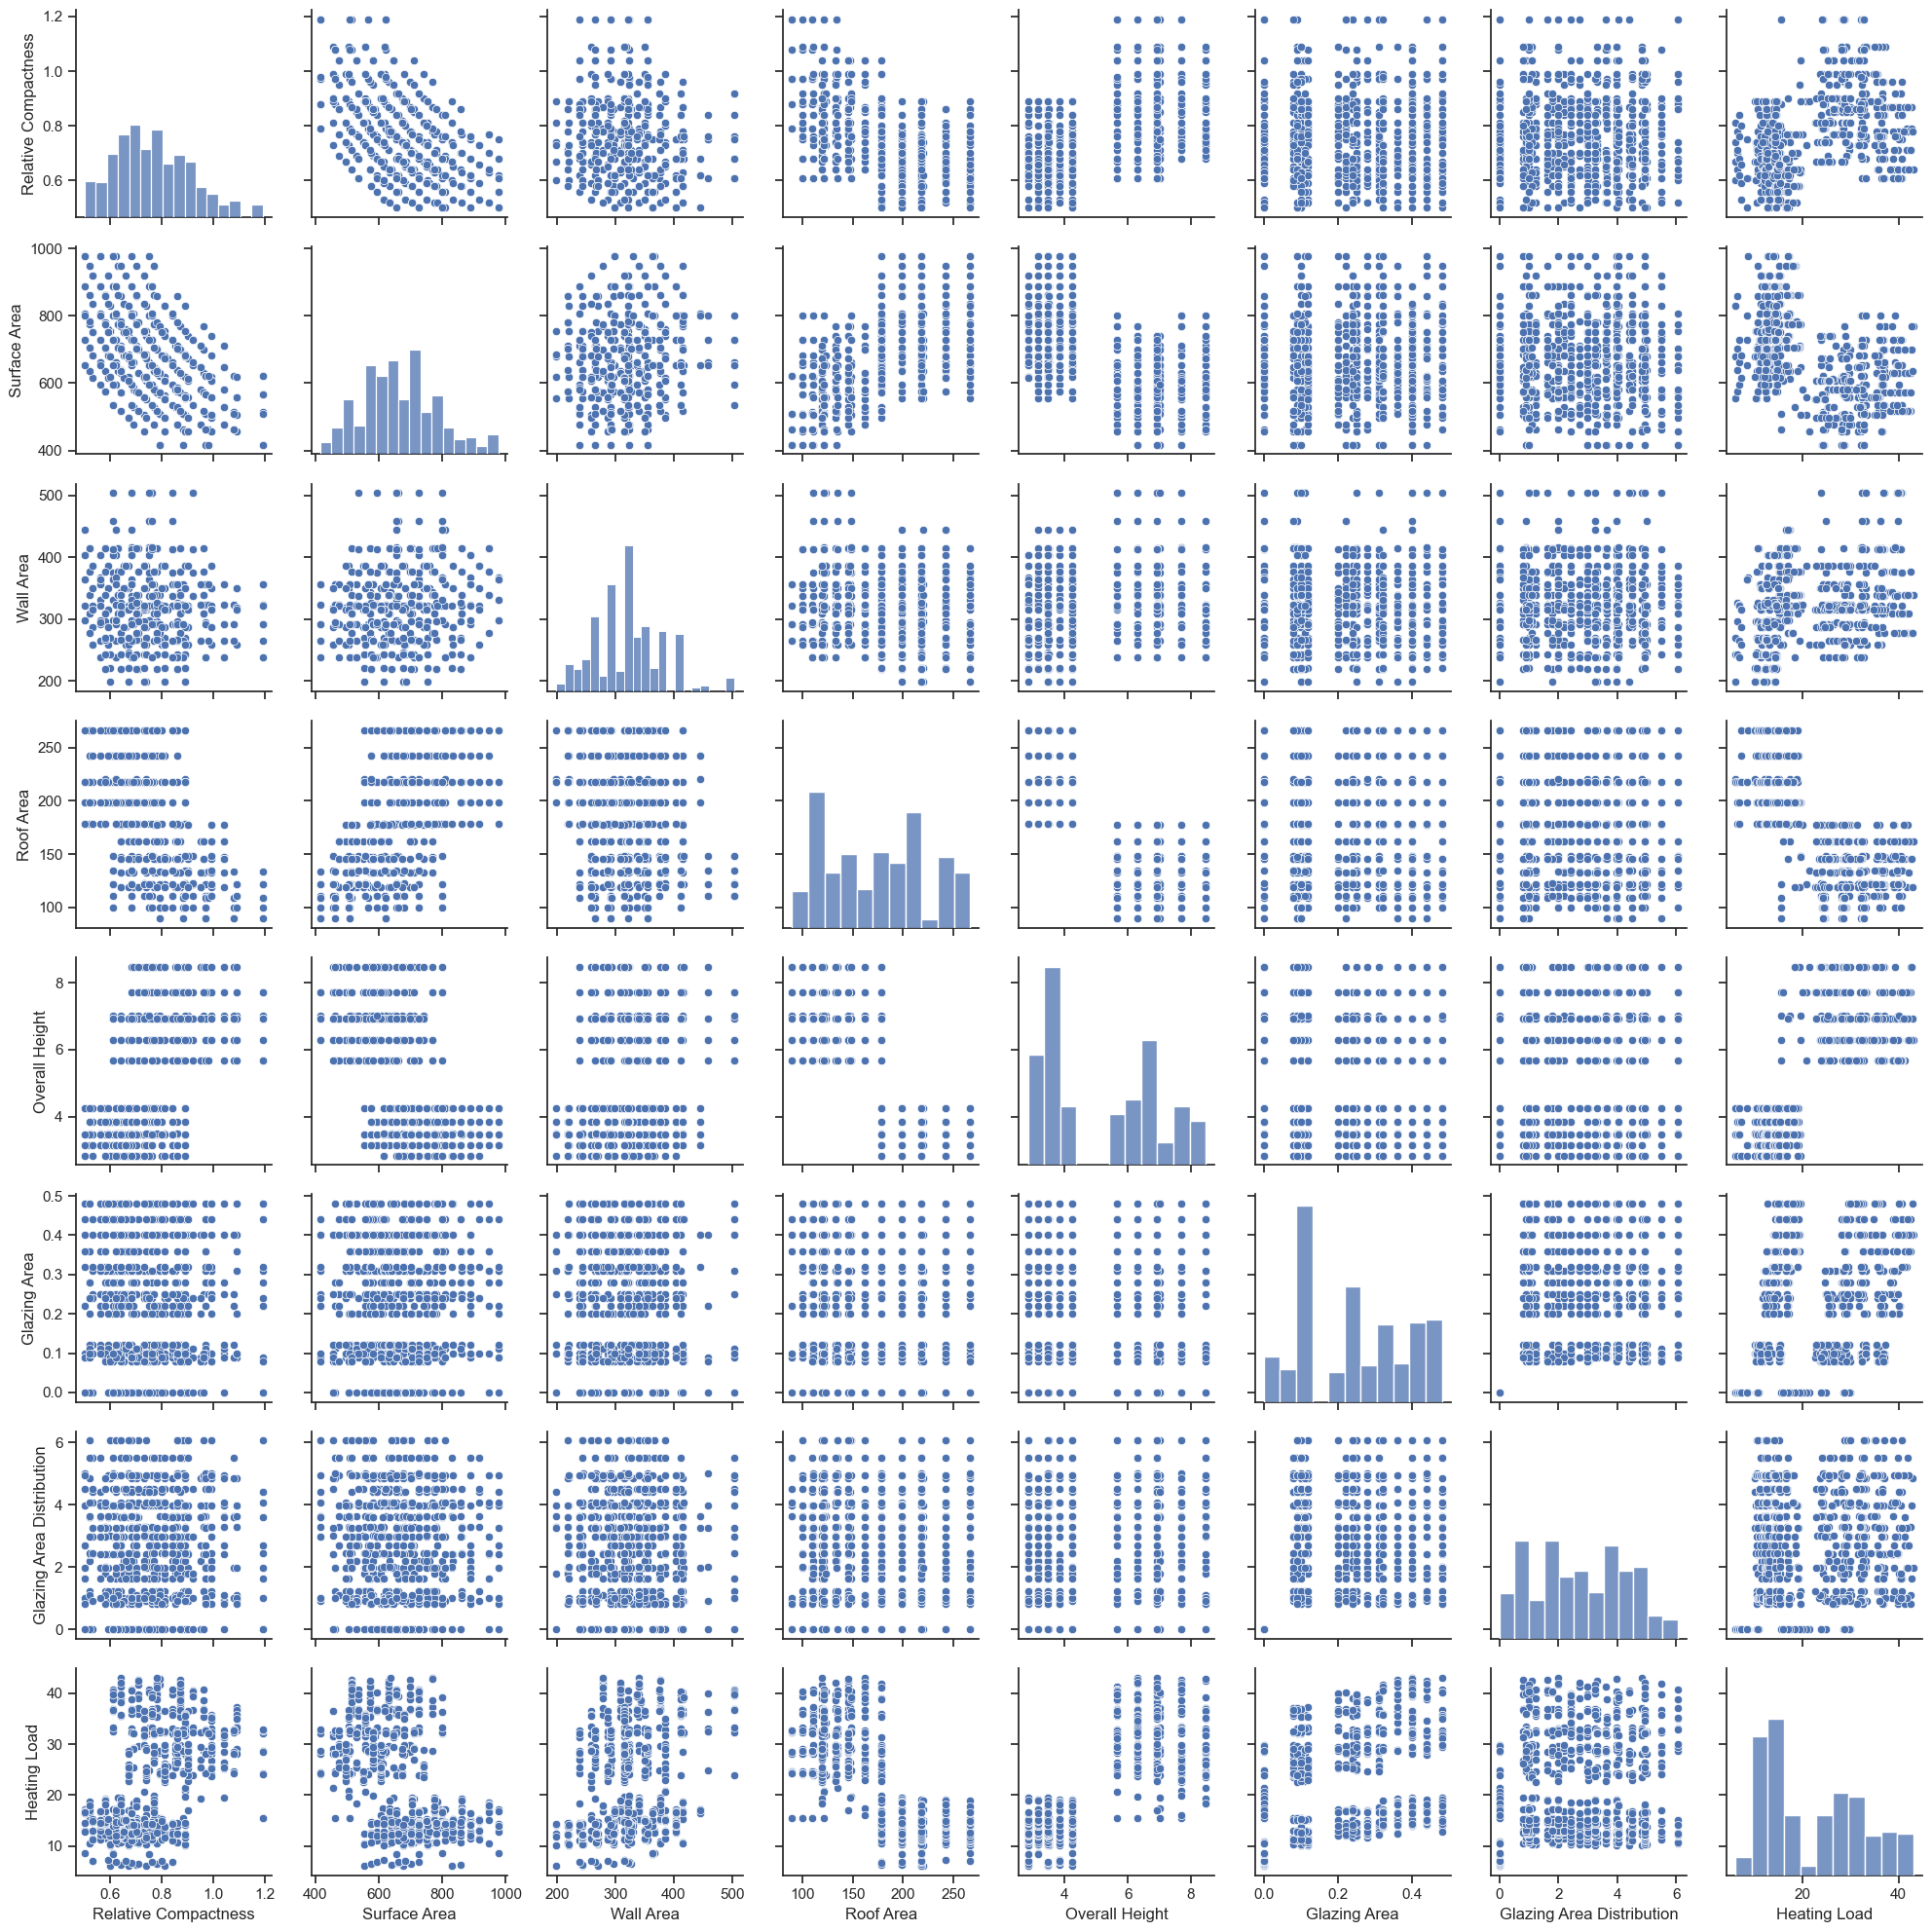

In [165]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data, vars=["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Glazing Area", "Glazing Area Distribution", "Heating Load"])
save_fig("pairplot")
plt.show()

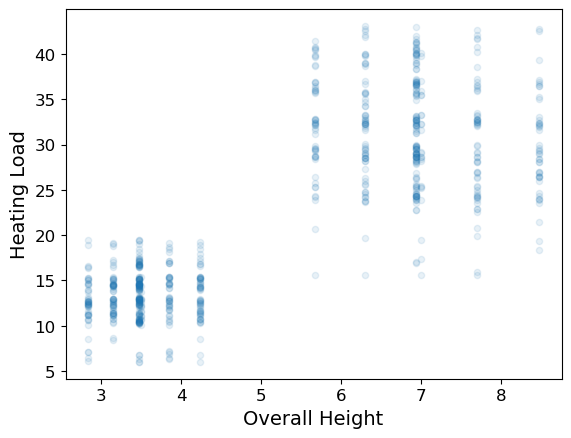

In [123]:
data.plot(kind="scatter", x="Overall Height", y="Heating Load", alpha=0.1)
plt.show()

#### Analyse: 
#### Higher overal height, and heating load is higher  after 5 , and reached peak at 7

# 3.3 Experimenting with Attribute/Variable Combinations

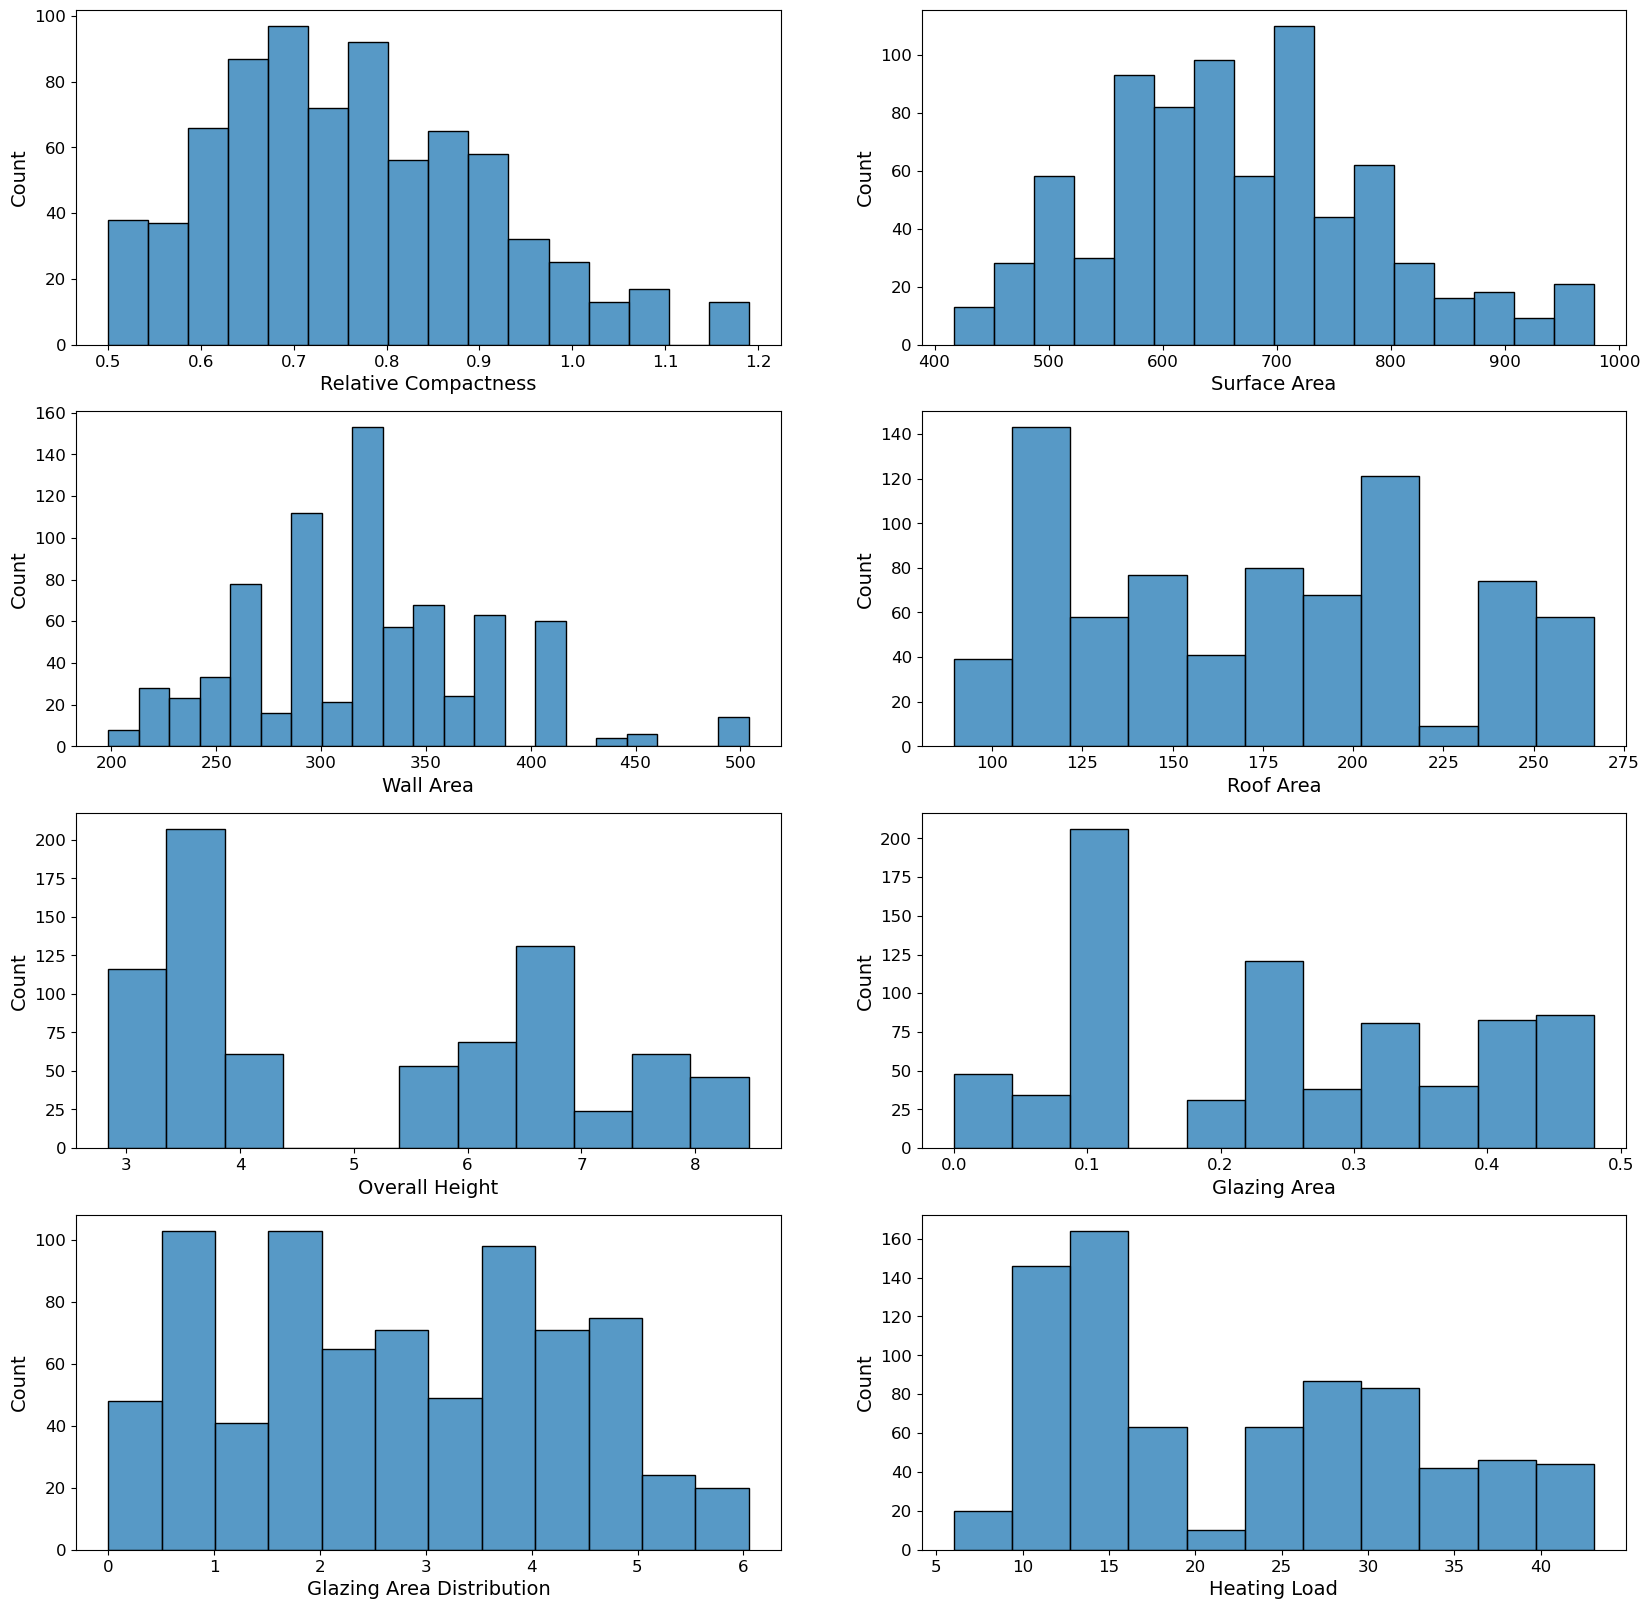

In [124]:
# histogram of the data

num_list=['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Glazing Area', 'Glazing Area Distribution', 'Heating Load']

fig, ax = plt.subplots(4,2, figsize=(20,20))

for i in range(0, len(num_list)):
    sns.histplot(data[num_list[i]], ax=ax[i//2, i%2])

plt.show()

# 3.4 Prepare the data for Machine learning algorithms

In [126]:
housing = strat_train_set.drop("Heating Load", axis=1) 
# drop labels for training set
housing_labels = strat_train_set["Heating Load"].copy()

In [127]:
print(housing.head())

    Building Category  Relative Compactness  Surface Area  Wall Area  \
511                C3                  0.64        639.45     266.80   
234                C1                  0.58        776.16     415.03   
597                C1                  0.92        654.89     412.34   
703                C3                  0.58        859.70     269.50   
14                 C1                  0.90        741.13     385.39   

     Roof Area  Overall Height  Orientation  Glazing Area  \
511     218.30            3.50         5.50          0.22   
234     178.60            4.24         4.00          0.10   
597     110.25            6.93         2.43          0.48   
703     218.30            2.84         4.95          0.44   
14      145.53            6.93         4.84          0.00   

     Glazing Area Distribution  
511                       4.05  
234                       4.84  
597                       1.80  
703                       3.96  
14                        0.00  


In [128]:
housing_labels.head()

511    12.27
234    15.32
597    40.15
703    14.66
14     16.95
Name: Heating Load, dtype: float64

# 3.5 Building and pipline for training set 
# Data cleaning
#### The SimpleImputer object named imputer is applied first, to fill in any missing values with the median of that feature.
#### The StandardScaler function is applied to standardize the features by removing the mean and scaling to unit variance.
#### The MinMaxScaler function is applied to scale the features to a range between 0 and 1.
#### The num_pipeline can then be used to transform the numerical features in a dataset by calling the fit_transform() method on it.

In [129]:

imputer = SimpleImputer(strategy="median")

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
        ('minmax_scaler', MinMaxScaler()),
    ])

The cat_attribs list is then printed to the console using the print() function. The purpose of creating this list is likely to use it as a parameter in a Scikit-Learn ColumnTransformer object, where it will specify which columns should be treated as categorical variables and transformed using a one-hot encoding method.

In [130]:
cat_attribs = ["Building Category"]
print(cat_attribs)

['Building Category']


A new DataFrame called prepare_num_attribs is created by dropping the columns "Building Category", "Heating Load", and "Heating_load_cat" from the train_set DataFrame. This is done using the drop() method with axis=1 (which means to drop columns) as the second argument.


A list called cat_attribs is created with a single string value "Building Category", representing the name of the categorical variable.

A list called num_attribs is created by converting the column names in prepare_num_attribs into a list using the list() function.

A ColumnTransformer object called full_pipeline is created. This object will apply a series of transformations to the dataset.
The full_pipeline object has two steps:

a. The first step is called "num", and it applies the num_pipeline object (defined earlier) to the columns specified in the num_attribs list. This pipeline will perform imputation, standard scaling and min-max scaling transformations to the numerical columns.

b. The second step is called "cat", and it applies the OneHotEncoder function to the column specified in the cat_attribs list. This function will perform one-hot encoding transformation to the categorical column.
The full_pipeline can then be used to transform a dataset by calling the fit_transform() method on it, which will apply the appropriate transformations to the numerical and categorical columns in the dataset.

In [131]:
prepare_num_attribs= train_set.drop(["Building Category","Heating Load", "Heating_load_cat"],axis=1)

cat_attribs = ["Building Category"]
num_attribs = list(prepare_num_attribs)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [132]:
train_set.head()

,Building Category,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Heating_load_cat
60,C1,0.81,496.12,286.65,145.53,7.70,2.00,0.09,0.99,23.53,3
618,C1,0.64,635.04,339.57,266.80,4.24,3.60,0.32,2.00,18.90,2
346,C1,0.69,582.12,264.60,161.70,8.47,3.24,0.25,1.80,29.27,3
294,C1,0.73,681.84,385.39,121.28,7.70,3.96,0.24,0.90,32.84,4
231,C3,0.66,683.55,315.32,198.45,3.15,4.50,0.11,4.40,11.43,2


In [133]:
housing.head()

,Building Category,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
511,C3,0.64,639.45,266.80,218.30,3.50,5.50,0.22,4.05
234,C1,0.58,776.16,415.03,178.60,4.24,4.00,0.10,4.84
597,C1,0.92,654.89,412.34,110.25,6.93,2.43,0.48,1.80
703,C3,0.58,859.70,269.50,218.30,2.84,4.95,0.44,3.96
14,C1,0.90,741.13,385.39,145.53,6.93,4.84,0.00,0.00


In [134]:
housing_preared= full_pipeline.fit_transform(housing)

In [135]:
housing_preared.shape

(614, 11)

## Features with one hot encoding 

In [136]:
print(housing_preared)

[[0.20289855 0.3965987  0.22371694 ... 0.         0.         1.        ]
 [0.11594203 0.64004986 0.70888976 ... 1.         0.         0.        ]
 [0.60869565 0.42409403 0.7000851  ... 1.         0.         0.        ]
 ...
 [0.4057971  0.39223578 0.47312778 ... 0.         1.         0.        ]
 [0.11594203 0.51047992 0.0649712  ... 0.         1.         0.        ]
 [0.34782609 0.46727807 0.14434407 ... 0.         1.         0.        ]]


# 4 Model fitting Create Models

In [137]:
x_train=housing_preared
y_train=housing_labels

# 4.0 fully testing data

In [138]:
x_test = full_pipeline.fit_transform(strat_test_set.drop('Heating Load', axis=1))
y_test = strat_test_set['Heating Load']

###  4.01 models initialization : 
#### 4.02 Rdige regression ;  
#### 4.03 Elastic Net Regression ;
#### 4.04 Neural Network ;

In [139]:
regressions = [['Ridge Regression ', Ridge()],
                      [' Elastic Net Regression', ElasticNet()],
                      ['NeuralNetwork', MLPRegressor()]] 

In [140]:
Accuracy = pd.DataFrame(index=None, columns=['Model', 'training_Heating', 'testing_Heating'])

In [141]:
for mod in regressions:
    name = mod[0]
    model = mod[1]
    model.fit(x_train, y_train)

    y_train_pred = r2_score(y_train, model.predict(x_train))
    y_test_pred = r2_score(y_test, model.predict(x_test))
    y_train_RMSE = np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
    y_test_RMSE = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
    y_train_MSE = mean_squared_error(y_train, model.predict(x_train))
    y_test_MSE = mean_squared_error(y_test, model.predict(x_test))
    
    Accuracy = Accuracy.append({'Model': name, 'training_Heating': y_train_pred, 'testing_Heating': y_test_pred, 'RMSE_training': y_train_RMSE, 
                                'RMSE_testing': y_test_RMSE,
                                'MSE_training': y_train_MSE, 'MSE_testing': y_test_MSE}, ignore_index=True)

/var/folders/_p/gfnktzm9703_5hc477v808r00000gn/T/ipykernel_8929/3055878645.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy = Accuracy.append({'Model': name, 'training_Heating': y_train_pred, 'testing_Heating': y_test_pred, 'RMSE_training': y_train_RMSE,
/var/folders/_p/gfnktzm9703_5hc477v808r00000gn/T/ipykernel_8929/3055878645.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Accuracy = Accuracy.append({'Model': name, 'training_Heating': y_train_pred, 'testing_Heating': y_test_pred, 'RMSE_training': y_train_RMSE,
/Users/xinyiyu/opt/anaconda3/envs/tf2/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/var/folders/_p/gfnktzm9703_5h

## 4.05 Comparing the different results including 
### training , testing, RMSE training, RMSE testing
### MSE training, MSE testing;


In [142]:
Accuracy.sort_values(by='testing_Heating')

,Model,training_Heating,testing_Heating,RMSE_training,RMSE_testing,MSE_training,MSE_testing
1,Elastic Net Regression,0.279542,0.272671,8.571812,8.547990,73.475953,73.068129
2,NeuralNetwork,0.799437,0.770221,4.522660,4.804559,20.454455,23.083786
0,Ridge Regression,0.807857,0.783257,4.426710,4.666284,19.595763,21.774202


Based on the data provided, the Ridge Regression model has the lowest RMSE on the test data, indicating that it has the lowest average deviation of predicted values from actual values among the three models on new, unseen data. However, the NeuralNetwork model has the highest training and test Heating scores, indicating that it is the best performing model overall. The Elastic Net Regression model has the highest RMSE on the test data, indicating that it has the highest average deviation of predicted values from actual values among the three models on new, unseen data.


In [143]:
print("CatBoostRegressor: R-squared on training set: {:.3f}".format(y_train_pred))
print("CatBoostRegressor: R-squared on test set: {:.3f}".format(y_test_pred))

CatBoostRegressor: R-squared on training set: 0.799
CatBoostRegressor: R-squared on test set: 0.770


# 4.1 Models parameters tuning

Boosting machine learning algorithms are highly used because they give better accuracy over simple ones. Performance of these algorithms depends on hyperparameters. An optimal set of parameters can help to achieve higher accuracy. Finding hyperparameters manually is tedious and computationally expensive. Therefore, automation of hyperparameters tuning is important. RandomSearch, GridSearchCV, and Bayesian optimization are generally used to optimize hyperparameters.

In this Notebook, we calculate the best parameters for the model using “GridSearchCV

A. Decision Tree Regressor parameters turning

Decision Tree algorithm has become one of the most used machine learning algorithm both in competitions like Kaggle as well as in business environment. Decision Tree can be used both in classification and regression problem. The model is based on decision rules extracted from the training data. In regression problem, the model uses the value instead of class and mean squared error is used to for a decision accuracy. Decision tree model is not good in generalization and sensitive to the changes in training data. A small change in a training dataset may effect the model predictive accuracy.

Parameters
max_features: The number of randomly chosen features from which to pick the best feature to split on a given tree node. It can be an integer or one of the two following methods (auto : square root of the total number of predictors. max : number of predictors.)
max_leaf_nodes: The maximum number of leaf nodes a tree in the forest can have, an integer between 1 and 1e9, inclusive.
max_depth: The maximum depth for growing each tree, an integer between 1 and 100, inclusive.
min_samples_leaf: The minimum number of samples each branch must have after splitting a node, an integer between 1 and 1e6, inclusive. A split that causes fewer remaining samples is discarded.
As observed in the fitting calculation section, we will try to tuning model parameters using the training data set of Cooling load (or y2_train).

# 4.2 Elastic net 
### 4.21 fine tuning for Elastic net to get best hyperparameters

#### this is important becasue we could adjust the unimportant features 

In [144]:
# create Elastic Net regression object
reg = ElasticNet()

# define hyperparameter distribution
param_dist = {
    'alpha': uniform(0, 1),
    'l1_ratio': uniform(0, 1),
    'fit_intercept': [True, False],
    'max_iter': [1000, 5000, 10000],
}

# perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, cv=5, n_iter=100)
random_search.fit(x_train, y_train)

# print the best hyperparameters and the best score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# get the best model
best_model = random_search.best_estimator_

# get the coefficients of the features
coeffs = best_model.coef_

# identify the least important feature
least_important_feature = np.argmin(np.abs(coeffs))

# print the least important feature
print(least_important_feature)

# set the coefficient of the least important feature to zero
coeffs[least_important_feature] = 0

print(coeffs)

# refit the model with the updated feature set
selected_features = x_train[:, coeffs != 0]
best_model.fit(selected_features, y_train)

# evaluate the performance of the updated model
selected_features_test = x_test[:, coeffs != 0]
y_pred = best_model.predict(selected_features_test)
score = best_model.score(selected_features_test, y_test)
print("Updated Model Score:", score)

Best Hyperparameters: {'alpha': 0.02284825374563959, 'fit_intercept': True, 'l1_ratio': 0.9619059428633662, 'max_iter': 1000}
Best Score: 0.8004626435502205
0
[ 0.         -0.69832566  7.71627237 -9.59556985 17.07116456 -0.55027848
  9.03136092  1.17713223  0.         -0.34897993  0.27426914]
Updated Model Score: 0.780957452307258


## 4.22 Experienmenting with the good hyperparametrs 

In [145]:
# create Elastic Net regression object
reg = ElasticNet()

# define hyperparameter distribution
param_dist = {
    'alpha': uniform(0, 1),
    'l1_ratio': uniform(0, 1),
    'fit_intercept': [True, False],
    'max_iter': [1000, 5000, 10000],
}

# perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, cv=5, n_iter=100)
random_search.fit(x_train, y_train)

# print the best hyperparameters and the best score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# get the best model
best_model = random_search.best_estimator_

# refit the model with the updated feature set
selected_features = x_train[:, coeffs != 0]
best_model.fit(selected_features, y_train)

# evaluate the performance of the updated model
selected_features_test = x_test[:, coeffs != 0]
y_pred = best_model.predict(selected_features_test)
score = best_model.score(selected_features_test, y_test)
print("Updated Model Score:", score)

Best Hyperparameters: {'alpha': 0.015752830420813213, 'fit_intercept': False, 'l1_ratio': 0.6848348735085324, 'max_iter': 1000}
Best Score: 0.7960733736240843
Updated Model Score: 0.7470869143856225


### Analyse: random search has found best hyperparameters. According to my understanding, the there are unrelated features in the dataset, even Elastic net model could automatically turn off and emphaise on important features. However, mannually turn off some features will help the model to increase accuracy

In [146]:
# elastic net regression
# create linear regression object
reg = ElasticNet(alpha=0.015798690468609378, l1_ratio=0.9746826317110788, fit_intercept=True, precompute=False, max_iter=5000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

# train the model using the training sets
reg.fit(x_train, y_train)

# make predictions using the testing set

y_pred_elastic = reg.predict(x_test)

# get the feature importance scores using the coefficients
feature_importance = abs(reg.coef_)

threshold = 0.1

# identify the indices of the unimportant features
unimportant_indices = np.where(feature_importance < threshold)[0]

# set the coefficients of unimportant features to zero
reg.coef_[unimportant_indices] = 0

# retrain the model using the updated coefficients
reg.fit(x_train, y_train)

# make predictions using the testing set
y_pred_elastic = reg.predict(x_test)

# The coefficients
print("Elastic Net Regression : R-squared on training set: {:.3f}".format(reg.score(x_train, y_train)))
print("Elastic Net Regression : R-squared on test set: {:.3f}".format(reg.score(x_test, y_test)))

#save modifed 
modifed_model_elastic = reg

Elastic Net Regression : R-squared on training set: 0.808
Elastic Net Regression : R-squared on test set: 0.782


#### the r sqaure on training increased to 0.808 from 0.79 ; on the test increased to 0.782 from 0.74

# 4.23 Ridge model fine tuning

In [148]:

# create Ridge regression object
ridge = Ridge()

# define hyperparameters to optimize
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# perform grid search with cross-validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# print the best hyperparameters and the best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# create Ridge regression object with best hyperparameters
reg = Ridge(alpha=grid_search.best_params_['alpha'])

# train the model using the training sets
reg.fit(x_train, y_train)

# extract the coefficients of the trained model
coeffs = np.abs(reg.coef_)

# identify the least important features by setting a threshold for the absolute values of the coefficients
threshold = 0.1
least_important_features = np.where(coeffs < threshold)[0]

# set the coefficients of the least important features to 0
reg.coef_[least_important_features] = 0

# create a new feature matrix by setting the columns corresponding to the least important features to 0
x_train_updated = np.delete(x_train, least_important_features, axis=1)
x_test_updated = np.delete(x_test, least_important_features, axis=1)

# train a new Ridge model on the updated feature matrix
reg.fit(x_train_updated, y_train)

# make predictions using the updated feature matrix
y_pred = reg.predict(x_test_updated)

#save it 
modified_modle_ridge =reg

# The coefficients
print("Ridge regression : R-squared on training set: {:.3f}".format(reg.score(x_train_updated, y_train)))
print("Ridge regression : R-squared on test set: {:.3f}".format(reg.score(x_test_updated, y_test)))

Best Hyperparameters: {'alpha': 1}
Best Score: 0.8009053604836216
Ridge regression : R-squared on training set: 0.808
Ridge regression : R-squared on test set: 0.783


### 4.24 Experimenting with the found best fit hyperparameters with results

In [149]:
# create ridge regression object
# fit the model using the training sets
modified_modle_ridge.fit(x_train, y_train)
# predict the response
ridge_pred = modified_modle_ridge.predict(x_test)
# evaluate predictions

print('R-Squared on training set dataset={}'.format(modified_modle_ridge.score(x_train, y_train)))
print('R-Squared on test set dataset={}'.format(modified_modle_ridge.score(x_test, y_test)))

R-Squared on training set dataset=0.8078565162094594
R-Squared on test set dataset=0.7832570048077521


# 4.25 Fine tuning for Neural network and find the best hyperparameters

In [150]:
# create MLP regressor object
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000)

# define the parameter grid for grid search
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'early_stopping': [True, False],
}

# perform grid search with cross-validation
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# print the best hyperparameters and the best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# fit the model with best hyperparameters
best_mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000,
                        alpha=0.0001, learning_rate='constant', early_stopping=True)
best_mlp.fit(x_train, y_train)

# make predictions using the testing set
y_pred = best_mlp.predict(x_test)

# calculate the R-squared score

print("MLP regressor : R-squared on training set: {:.3f}".format(best_mlp.score(x_train, y_train)))
print("MLP regressor : R-squared on test set: {:.3f}".format(best_mlp.score(x_test, y_test)))

/Users/xinyiyu/opt/anaconda3/envs/tf2/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/xinyiyu/opt/anaconda3/envs/tf2/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/xinyiyu/opt/anaconda3/envs/tf2/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/xinyiyu/opt/anaconda3/envs/tf2/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't conv

Best Hyperparameters: {'alpha': 0.001, 'early_stopping': False, 'learning_rate': 'adaptive'}
Best Score: 0.8864178187422722
MLP regressor : R-squared on training set: 0.861
MLP regressor : R-squared on test set: 0.840


### 4.26 Using the hyperparameters to get R squred result 

In [151]:
MLPR = MLPRegressor(hidden_layer_sizes=[100,180,50], alpha=0.01, learning_rate='constant', early_stopping=False, max_iter=1000)

MLPR.fit(x_train, y_train)

print('R-Squared on training set dataset={}'.format(MLPR.score(x_train, y_train)))
print('R-Squared on test set dataset={}'.format(MLPR.score(x_test, y_test)))

R-Squared on training set dataset=0.9115082317153496
R-Squared on test set dataset=0.8838938748704577


# 4.3 Find the best model 

In [152]:
result_mode = pd.DataFrame(index=None, columns=['Model', 'traning_score', 'test_score'])

# 4.31 using the model for already train to predict with test data

In [153]:
result_regressors= [[
    'Ridge Regression', modified_modle_ridge],
    ['Elastic Net Regression', modifed_model_elastic],
    ['MLPRegressor', MLPR]]

## 4.32 Comparing the different results including 
### training , testing, RMSE training, RMSE testing
### MSE training, MSE testing;


In [154]:
for mod in result_regressors:
    name = mod[0]
    model = mod[1]

    y_train_pred = model.score(x_train, y_train)
    y_test_pred = model.score(x_test, y_test)
    y_train_RMSE = np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
    y_test_RMSE = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
    y_train_MSE = mean_squared_error(y_train, model.predict(x_train))
    y_test_MSE = mean_squared_error(y_test, model.predict(x_test))

    result_mode = result_mode.append({'Model': name, 'traning_score': y_train_pred, 'test_score': y_test_pred,
                                      'traning_RMSE': y_train_RMSE, 'test_RMSE': y_test_RMSE,
                                        'traning_MSE': y_train_MSE, 'test_MSE': y_test_MSE
                                      }, ignore_index=True)

result_mode

/var/folders/_p/gfnktzm9703_5hc477v808r00000gn/T/ipykernel_8929/1575483368.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_mode = result_mode.append({'Model': name, 'traning_score': y_train_pred, 'test_score': y_test_pred,
/var/folders/_p/gfnktzm9703_5hc477v808r00000gn/T/ipykernel_8929/1575483368.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_mode = result_mode.append({'Model': name, 'traning_score': y_train_pred, 'test_score': y_test_pred,
/var/folders/_p/gfnktzm9703_5hc477v808r00000gn/T/ipykernel_8929/1575483368.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_mode = result_mode.append({'Model': name, 'traning_score': y_train_pred, 'test_score': y_test_pred,


,Model,traning_score,test_score,traning_RMSE,test_RMSE,traning_MSE,test_MSE
0,Ridge Regression,0.807857,0.783257,4.426710,4.666284,19.595763,21.774202
1,Elastic Net Regression,0.807508,0.781982,4.430727,4.679986,19.631338,21.902270
2,MLPRegressor,0.911508,0.883894,3.004137,3.415279,9.024838,11.664129


### The performance of each model was evaluated using two metrics:

### Training Score: This is the R-squared value of the model on the training data. It tells us how well the model fits the training data, with a value of 1 indicating a perfect fit.

#### Test Score: This is the R-squared value of the model on the test data. It tells us how well the model generalizes to new data, with a value of 1 indicating a perfect fit.
#### In addition, the root mean squared error (RMSE) and mean squared error (MSE) were also calculated for each model on both the training and test data. RMSE is a measure of the average deviation of the predicted values from the actual values, while MSE is the average of the squared differences between the predicted and actual values.

#### Based on the data provided, the MLPRegressor model has the highest training and test scores, indicating that it is the best performing model overall. However, when it comes to RMSE, the Ridge Regression model has the lowest value on the test data, indicating that it has the lowest average deviation of predicted values from actual values among the three models on new, unseen data.


# 4.33 Comparing result train and test data

In [155]:

print("Elastic Net Regression : R-squared on training set: {:.3f}".format(ElasticNet.score(modified_modle_ridge, x_train, y_train)))
print("Elastic Net Regression : R-squared on test set: {:.3f}".format(ElasticNet.score(modified_modle_ridge, x_test, y_test)))
print('Neural network on training set dataset={}'.format(MLPR.score(x_train, y_train)))
print('Neural network on test set dataset={}'.format(MLPR.score(x_test, y_test)))
print('Ridge regression on training set dataset={}'.format(modified_modle_ridge.score(x_train, y_train)))
print('Ridge regression on test set dataset={}'.format(modified_modle_ridge.score(x_test, y_test)))

Elastic Net Regression : R-squared on training set: 0.808
Elastic Net Regression : R-squared on test set: 0.783
Neural network on training set dataset=0.9115082317153496
Neural network on test set dataset=0.8838938748704577
Ridge regression on training set dataset=0.8078565162094594
Ridge regression on test set dataset=0.7832570048077521


# 5 Conlusion two model: 

## 5.1 Choosing Neural network && Elastic Net Regression

## 5.2 Visualize the Neural network prediction and error rate

In [156]:
y_predcition = MLPR.predict(x_test)

## 5.3 visualize the comparison between original data and predicted data.

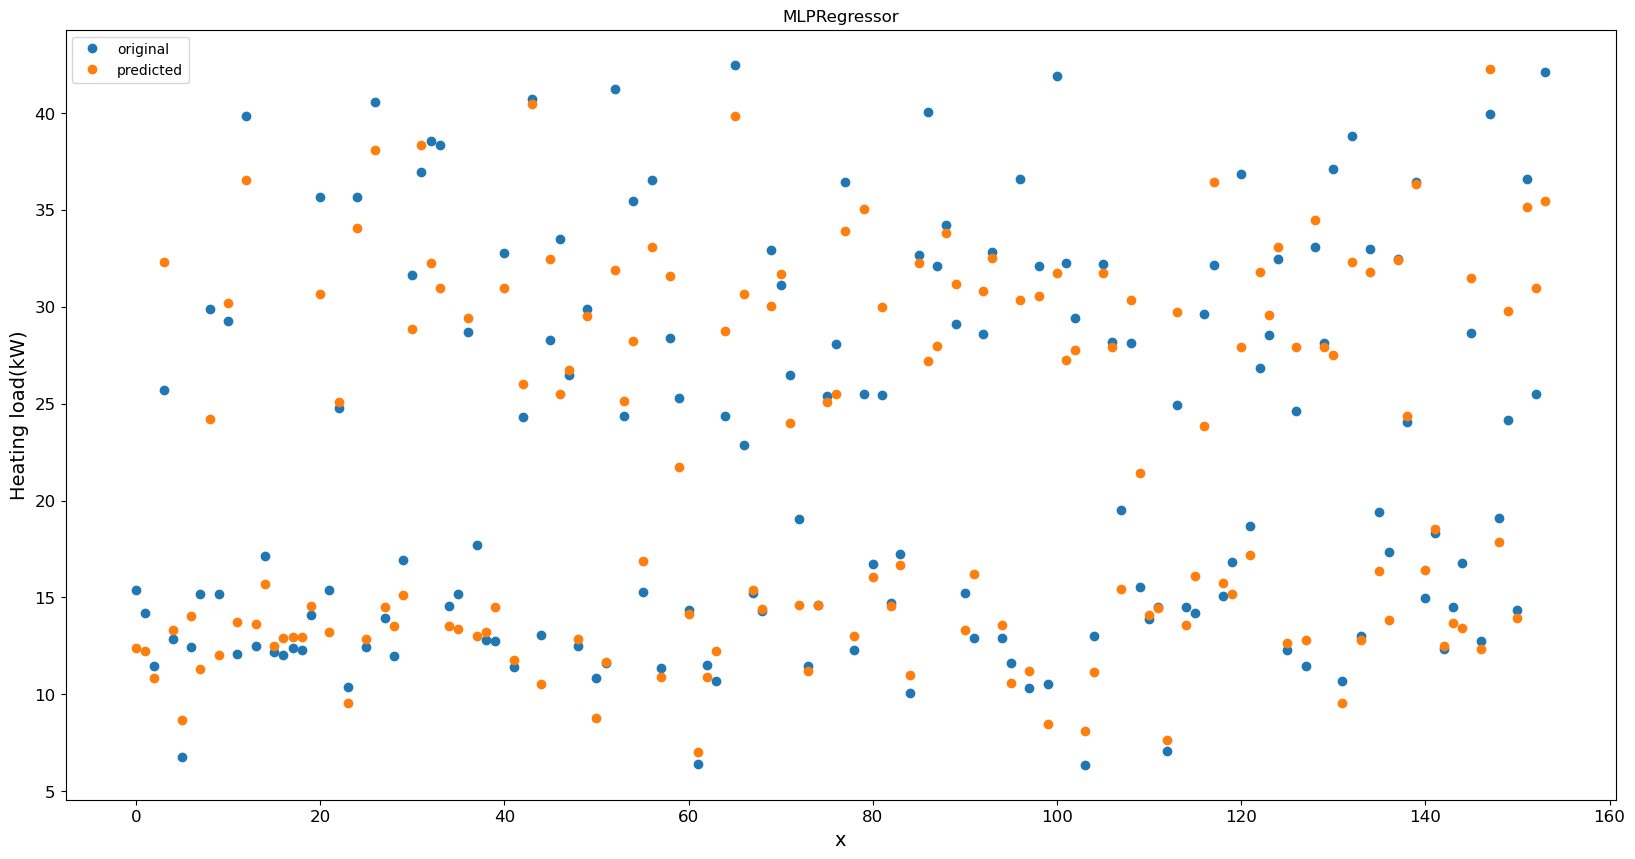

In [157]:
x_ax = range(len(y_test))
plt.figure(figsize=(20,10))
plt.plot(x_ax, y_test, 'o', label="original")
plt.plot(x_ax, y_predcition, 'o', label="predicted")
plt.title("MLPRegressor")
plt.xlabel('x')
plt.ylabel('Heating load(kW)')
plt.legend()
plt.show()


In [159]:
y_test = y_test.reset_index(drop=True)
y_test_array=np.array(y_test)
last_result= []
#print(y_test_array)
#print(y_test_array.shape)
#print(y_predcition.shape)
#print(y_test_array)
#print(y_test_array[151])
#print(y_predcition)    
#len(y_test)
#len(y_predcition)
#y_predcition.shape
# how to check the type of the data
#type(y_predcition)
#len(y_predcition)
#type(y_test)
#y_predcition[3]
#print(y_test)


In [160]:
for i in range(len(y_predcition)):
    last_result.append((y_predcition[i] - y_test_array[i])/y_test_array[i]*100)
#print(last_result)

### 5.4 "Relative deviation obtained on Heating load" refers to the percentage difference between the predicted heating load and the actual heating load. This deviation is calculated by comparing the predicted values of heating load with the actual values and then calculating the percentage difference between them.

### For example, if the actual heating load is 10 kW and the predicted heating load is 9 kW, then the relative deviation would be (10-9)/10 * 100 = 10%. This means that the predicted value is 10% lower than the actual value.

### The plot of "Relative deviation obtained on Heating load" shows how the predicted values deviate from the actual values on a percentage scale, and it can give an idea of how well the model is performing. A lower deviation indicates that the model is performing better, while a higher deviation indicates that the model may need improvement.

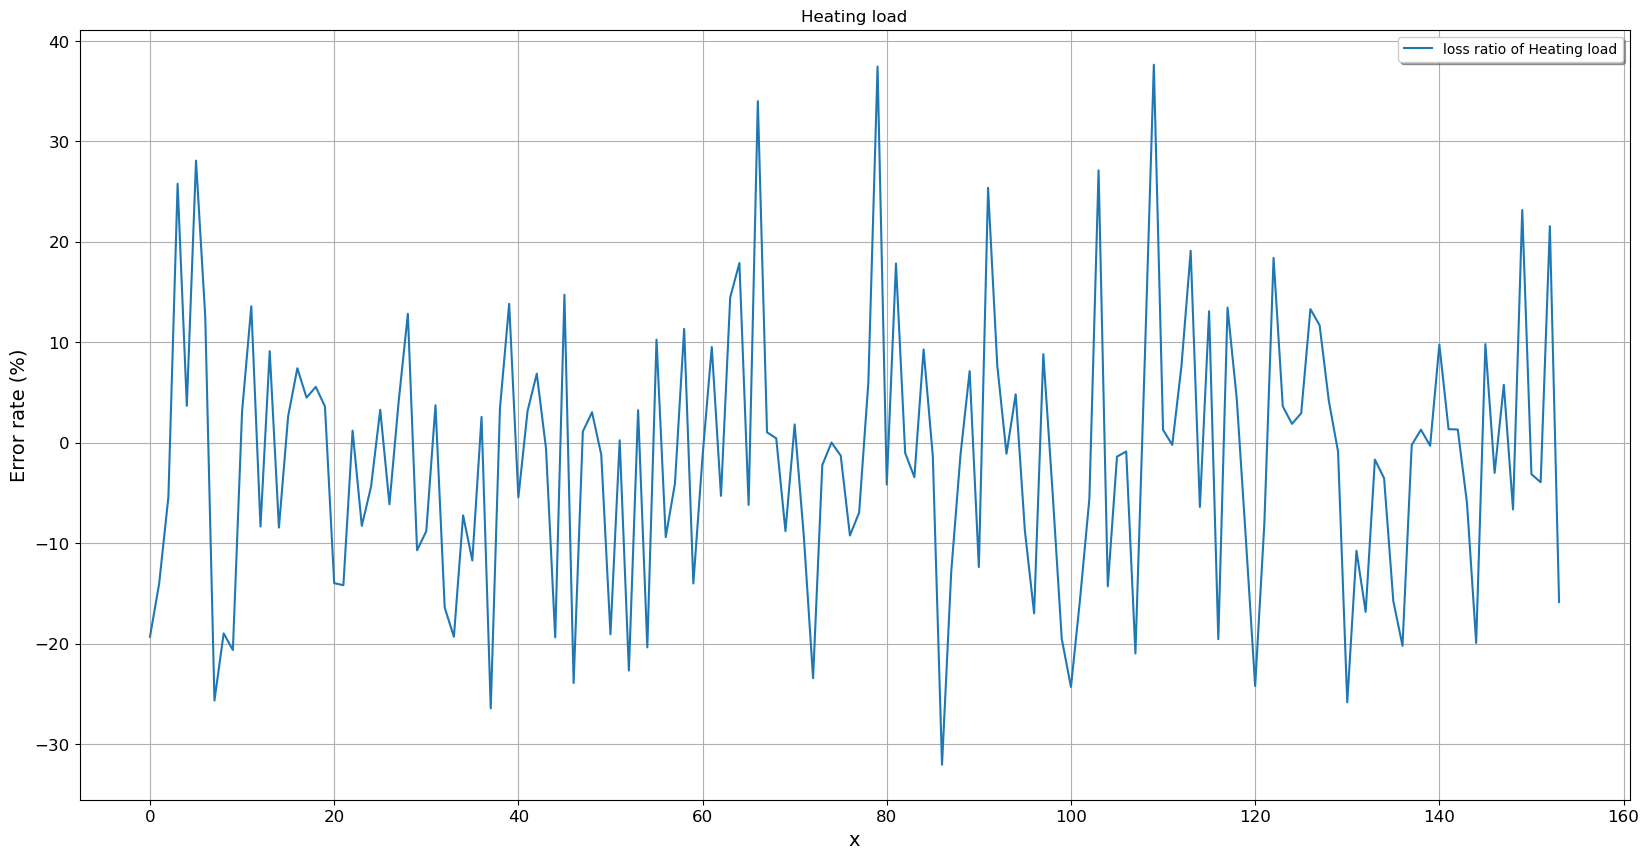

In [161]:
x_ax= range(len(y_test_array))
plt.figure(figsize=(20,10))
plt.plot(x_ax, last_result, label="loss ratio of Heating load")
plt.title("Heating load")
plt.xlabel('x')
plt.ylabel('Error rate (%)')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()


# 5.5 Elastic net prediction and error rate

In [162]:
y_prediction_elastic = modifed_model_elastic.predict(x_test)

## 5.6 visualize the comparison between original data and predicted data.

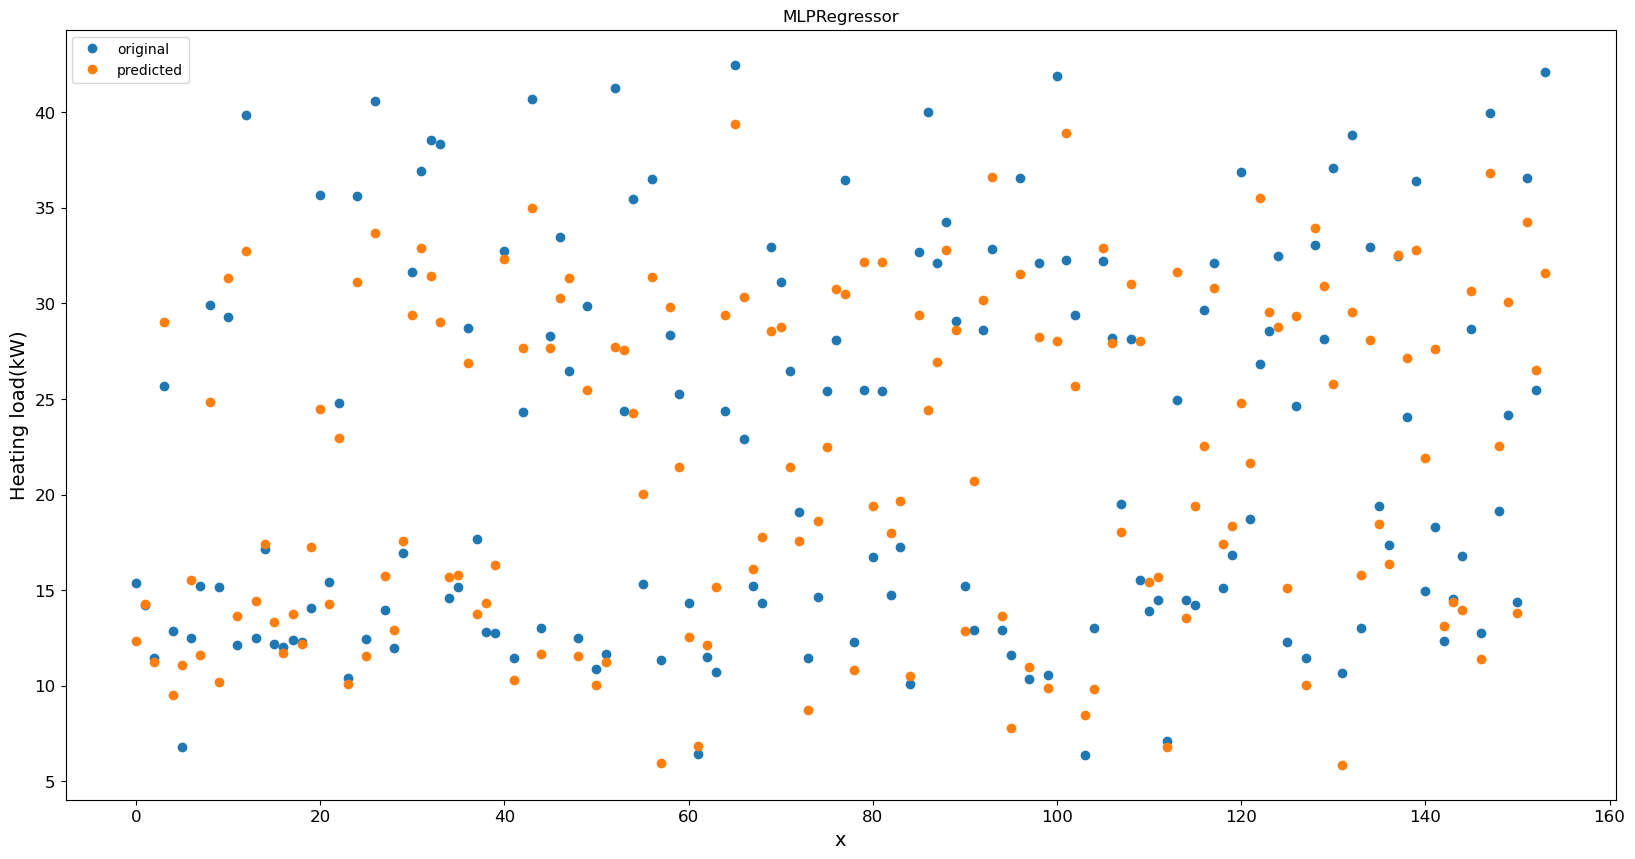

In [163]:
x_ax = range(len(y_test))

plt.figure(figsize=(20,10))
plt.plot(x_ax, y_test, 'o', label="original")
plt.plot(x_ax, y_prediction_elastic, 'o', label="predicted")
plt.title("MLPRegressor")
plt.xlabel('x')
plt.ylabel('Heating load(kW)')
plt.legend()
plt.show()


### "Relative deviation obtained on Heating load" refers to the percentage difference between the predicted heating load and the actual heating load. This deviation is calculated by comparing the predicted values of heating load with the actual values and then calculating the percentage difference between them.

### For example, if the actual heating load is 10 kW and the predicted heating load is 9 kW, then the relative deviation would be (10-9)/10 * 100 = 10%. This means that the predicted value is 10% lower than the actual value.

### The plot of "Relative deviation obtained on Heating load" shows how the predicted values deviate from the actual values on a percentage scale, and it can give an idea of how well the model is performing. A lower deviation indicates that the model is performing better, while a higher deviation indicates that the model may need improvement.

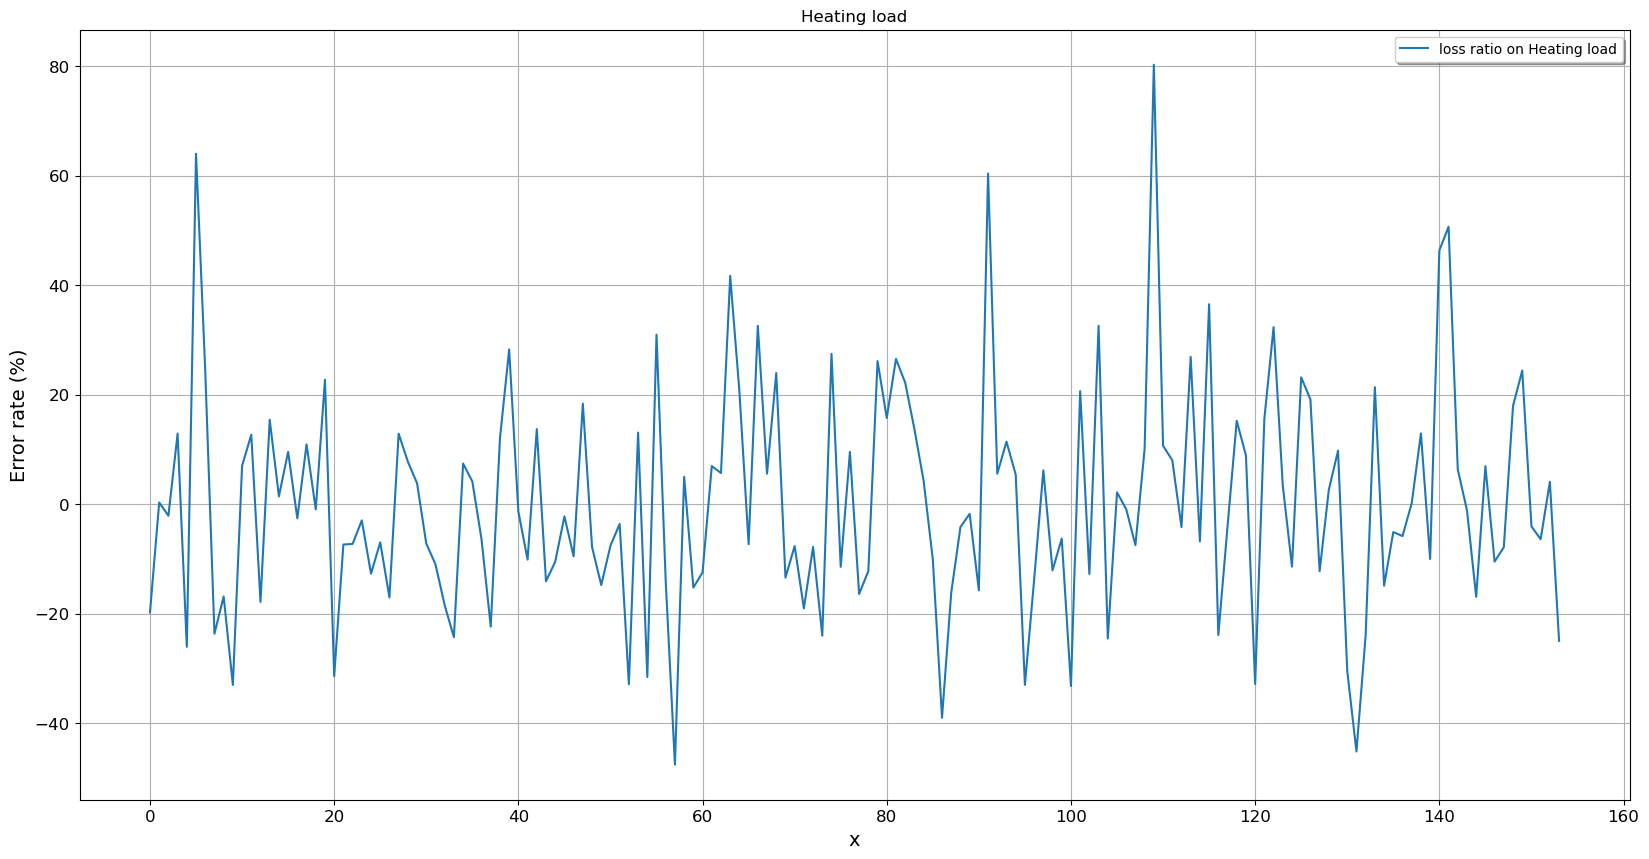

In [164]:
y_test = y_test.reset_index(drop=True)

y_test_array=np.array(y_test)

last_result_elastic= []
for i in range(len(y_prediction_elastic)):
    last_result_elastic.append((y_prediction_elastic[i] - y_test_array[i])/y_test_array[i]*100)

x_ax= range(len(y_test_array))
plt.figure(figsize=(20,10))

plt.plot(x_ax, last_result_elastic, label="loss ratio on Heating load")
plt.title("Heating load")
plt.xlabel('x')
plt.ylabel('Error rate (%)')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()


#### CONCLUSION: Based on the given data, the MLPRegressor model outperforms the Elastic Net Regression model in terms of both training and testing scores. The MLPRegressor model has a higher training score of 0.911 and a higher testing score of 0.884, while the Elastic Net Regression model has a training score of 0.808 and a testing score of 0.782.

#### In terms of RMSE, the MLPRegressor model also performs better than the Elastic Net Regression model. The MLPRegressor has a lower training RMSE of 3.004 and a lower testing RMSE of 3.415, while the Elastic Net Regression model has a training RMSE of 4.431 and a testing RMSE of 4.680.

#### Overall, the MLPRegressor model seems to be a better choice for predicting the heating load of housing compared to the Elastic Net Regression model, based on the given data.

